In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.1
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


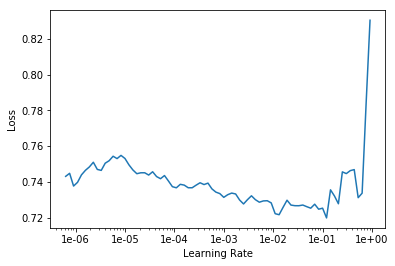

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:37
epoch  train_loss  valid_loss  accuracy
1      0.664084    0.690357    0.517375  (00:09)
2      0.643232    0.686176    0.567568  (00:09)
3      0.618692    0.657653    0.586873  (00:09)
4      0.605883    0.648370    0.629344  (00:09)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:21
epoch  train_loss  valid_loss  accuracy
1      0.610655    0.614206    0.687259  (00:22)
2      0.585507    0.665215    0.606178  (00:22)
3      0.563650    0.541748    0.764479  (00:25)
4      0.593379    0.561766    0.756757  (00:19)
5      0.571770    0.469532    0.826255  (00:21)
6      0.553225    0.438435    0.857143  (00:19)
7      0.487941    0.411185    0.861004  (00:22)
8      0.441942    0.376876    0.872587  (00:23)
9      0.425449    0.411308    0.845560  (00:23)
10     0.461822    0.352652    0.872587  (00:19)
11     0.422644    0.321929    0.903475  (00:23)
12     0.402479    0.316722    0.903475  (00:21)
13     0.381646    0.314837    0.872587  (00:21)
14     0.425535    0.341428    0.864865  (00:19)
15     0.381055    0.324098    0.876448  (00:20)
16     0.323279    0.273325    0.880309  (00:23)
17     0.297198    0.302519    0.899614  (00:24)
18     0.328204    0.315920    0.872587  (00:21)
19     0.315126    0.261068    0.903475  (00:24)
20     0.34

In [11]:
learn.validate()

[0.3423323, tensor(0.8533)]

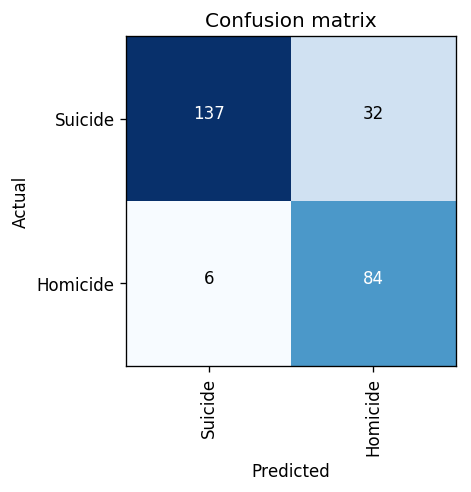

In [12]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

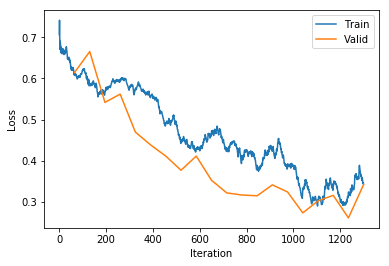

In [13]:
learn.recorder.plot_losses()

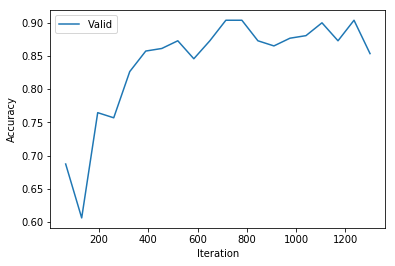

In [14]:
learn.recorder.plot_metrics()

In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


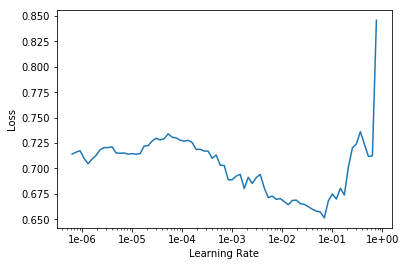

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.622467    0.676356    0.555985  (00:09)
2      0.632306    0.652101    0.660232  (00:08)
3      0.656409    0.599359    0.718147  (00:08)
4      0.650631    0.659309    0.687259  (00:07)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:25
epoch  train_loss  valid_loss  accuracy
1      0.600588    0.613614    0.679537  (00:21)
2      0.563539    0.567517    0.722008  (00:25)
3      0.590658    0.491004    0.791506  (00:19)
4      0.516241    0.484331    0.787645  (00:25)
5      0.509662    0.475966    0.803089  (00:24)
6      0.536595    0.382066    0.888031  (00:19)
7      0.466361    0.407844    0.849421  (00:25)
8      0.461482    0.460916    0.837838  (00:22)
9      0.416044    0.392555    0.853282  (00:23)
10     0.417371    0.369671    0.872587  (00:20)
11     0.386053    0.322497    0.903475  (00:25)
12     0.380544    0.348589    0.895753  (00:22)
13     0.394092    0.361110    0.868726  (00:20)
14     0.397330    0.340707    0.895753  (00:20)
15     0.384869    0.334939    0.872587  (00:19)
16     0.376630    0.302949    0.907336  (00:20)
17     0.308653    0.386946    0.853282  (00:24)
18     0.372242    0.282910    0.899614  (00:19)
19     0.366545    0.245772    0.907336  (00:19)
20     0.26

In [20]:
learn.validate()

[0.31839144, tensor(0.8958)]

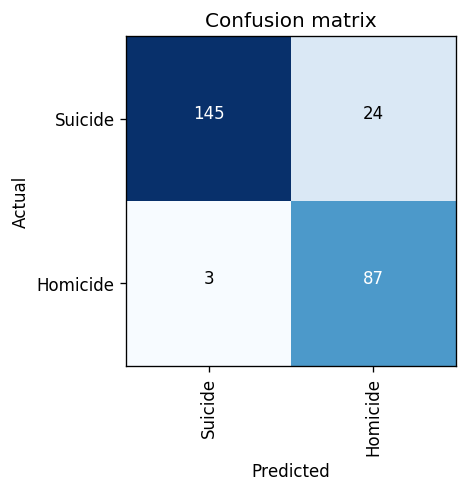

In [21]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

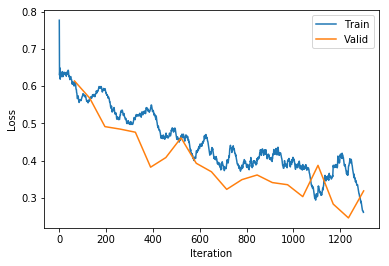

In [22]:
learn.recorder.plot_losses()

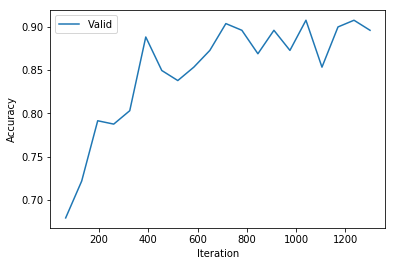

In [23]:
learn.recorder.plot_metrics()

In [24]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


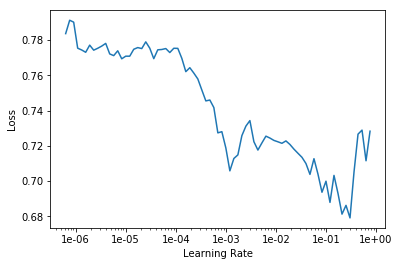

In [26]:
learn.recorder.plot()

In [27]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.719766    0.685585    0.494208  (00:07)
2      0.657134    0.657921    0.544402  (00:09)
3      0.646551    0.669240    0.528958  (00:08)
4      0.663064    0.667982    0.552124  (00:07)



In [28]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:22
epoch  train_loss  valid_loss  accuracy
1      0.569857    0.656902    0.617761  (00:25)
2      0.581816    0.571504    0.756757  (00:23)
3      0.607777    0.532973    0.779923  (00:19)
4      0.536025    0.518206    0.791506  (00:25)
5      0.579753    0.507971    0.803089  (00:19)
6      0.536278    0.505103    0.791506  (00:20)
7      0.480221    0.496304    0.803089  (00:23)
8      0.452641    0.458044    0.822394  (00:23)
9      0.480867    0.404566    0.845560  (00:19)
10     0.456888    0.382757    0.857143  (00:19)
11     0.422217    0.418724    0.818533  (00:21)
12     0.388215    0.496328    0.806950  (00:22)
13     0.410809    0.371173    0.857143  (00:19)
14     0.414752    0.405409    0.826255  (00:19)
15     0.347649    0.397470    0.833977  (00:22)
16     0.309943    0.334323    0.884170  (00:22)
17     0.305462    0.289839    0.888031  (00:23)
18     0.280638    0.314332    0.876448  (00:26)
19     0.273021    0.283537    0.876448  (00:24)
20     0.28

In [29]:
learn.validate()

[0.26858908, tensor(0.8919)]

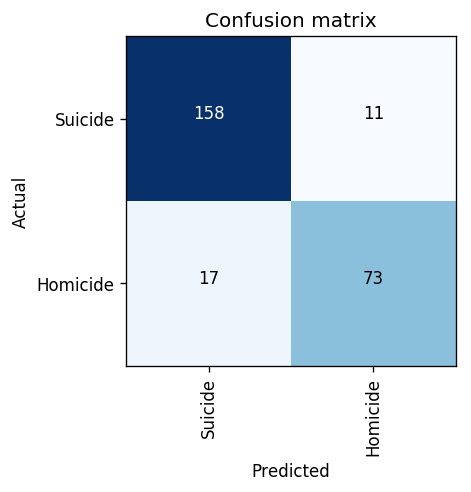

In [30]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

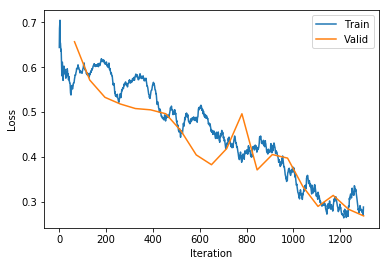

In [31]:
learn.recorder.plot_losses()

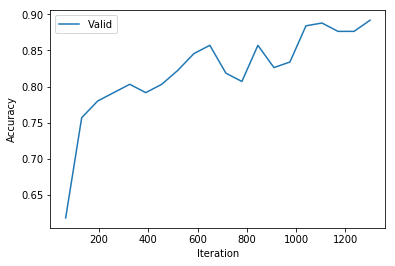

In [32]:
learn.recorder.plot_metrics()

In [33]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


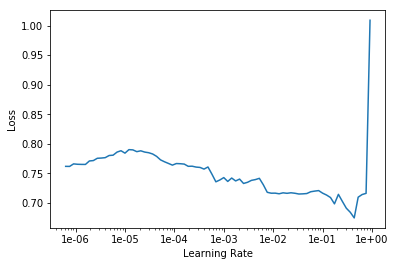

In [35]:
learn.recorder.plot()

In [36]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:37
epoch  train_loss  valid_loss  accuracy
1      0.709379    0.655142    0.629344  (00:08)
2      0.645115    0.709437    0.498069  (00:09)
3      0.637793    0.720198    0.501930  (00:09)
4      0.630930    0.689587    0.575290  (00:09)



In [37]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:39
epoch  train_loss  valid_loss  accuracy
1      0.623597    0.535161    0.768340  (00:22)
2      0.601330    0.542398    0.791506  (00:24)
3      0.616213    0.566570    0.768340  (00:19)
4      0.513525    0.549202    0.776062  (00:25)
5      0.541449    0.485429    0.849421  (00:20)
6      0.476665    0.405397    0.818533  (00:24)
7      0.450284    0.431695    0.849421  (00:24)
8      0.406040    0.444933    0.830116  (00:26)
9      0.387819    0.366608    0.853282  (00:25)
10     0.434308    0.418673    0.857143  (00:19)
11     0.427420    0.373069    0.849421  (00:20)
12     0.386769    0.351097    0.895753  (00:23)
13     0.347112    0.401397    0.861004  (00:25)
14     0.316819    0.308448    0.876448  (00:25)
15     0.316135    0.299902    0.864865  (00:22)
16     0.373236    0.286712    0.907336  (00:20)
17     0.348233    0.283512    0.899614  (00:22)
18     0.335719    0.273161    0.888031  (00:20)
19     0.295293    0.276644    0.899614  (00:23)
20     0.29

In [38]:
learn.validate()

[0.31289765, tensor(0.8764)]

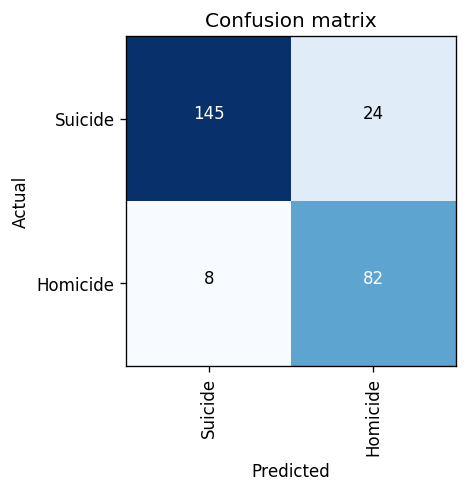

In [39]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

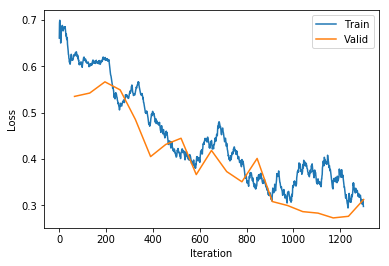

In [40]:
learn.recorder.plot_losses()

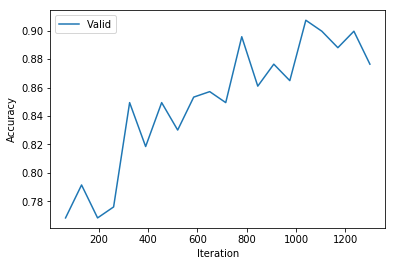

In [41]:
learn.recorder.plot_metrics()

In [42]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_pretrained')

learn.freeze()

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


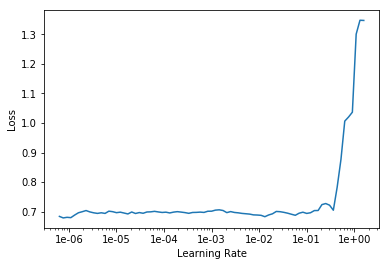

In [44]:
learn.recorder.plot()

In [45]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:36
epoch  train_loss  valid_loss  accuracy
1      0.620263    0.544660    0.760618  (00:08)
2      0.587487    0.560165    0.764479  (00:09)
3      0.557237    0.562626    0.749035  (00:09)
4      0.557943    0.555222    0.745174  (00:09)



In [46]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:28
epoch  train_loss  valid_loss  accuracy
1      0.594143    0.477399    0.841699  (00:19)
2      0.512506    0.579709    0.722008  (00:24)
3      0.482989    0.469735    0.826255  (00:25)
4      0.496220    0.443483    0.822394  (00:24)
5      0.484708    0.454842    0.787645  (00:22)
6      0.498106    0.426610    0.826255  (00:20)
7      0.426728    0.400687    0.837838  (00:24)
8      0.410233    0.365779    0.861004  (00:23)
9      0.380664    0.343883    0.864865  (00:25)
10     0.345931    0.332743    0.868726  (00:24)
11     0.404106    0.316545    0.872587  (00:19)
12     0.337069    0.292932    0.876448  (00:25)
13     0.352232    0.383253    0.849421  (00:22)
14     0.339967    0.280593    0.899614  (00:21)
15     0.331303    0.291590    0.895753  (00:24)
16     0.327924    0.267164    0.876448  (00:22)
17     0.337288    0.248976    0.899614  (00:20)
18     0.359752    0.274379    0.876448  (00:19)
19     0.399294    0.260497    0.891892  (00:19)
20     0.37

In [47]:
learn.validate()

[0.2793234, tensor(0.8764)]

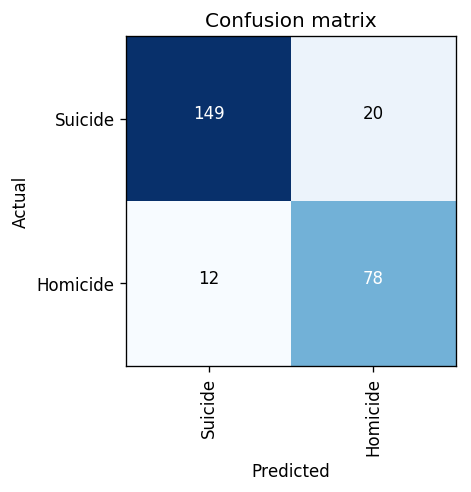

In [48]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

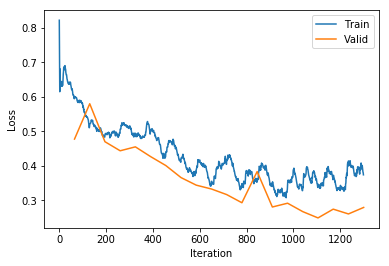

In [49]:
learn.recorder.plot_losses()

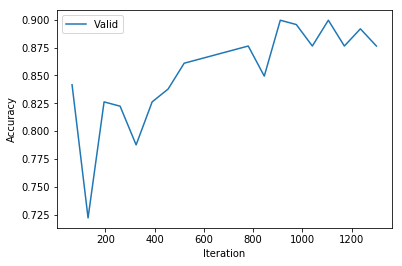

In [50]:
learn.recorder.plot_metrics()

In [51]:
print(accuracy_list)

[0.8532818555831909, 0.8957529067993164, 0.8918918967247009, 0.876447856426239, 0.876447856426239]


In [52]:
print(sum(accuracy_list)/len(accuracy_list))

0.8787644743919373


In [53]:
print(statistics.variance(accuracy_list))

0.00028025833792817424


In [54]:
import torch

torch.cuda.empty_cache()